# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Loading and preprocessing dataset

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Kali\Downloads\retail_sales.csv')
data = df.sort_index(ascending=True, axis=0)['Sales'].values

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

In [6]:
scaled_data.shape

(52585, 1)

In [3]:
# Create a data structure with 60 time-steps and 1 output
x_train, y_train = [], []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [4]:
x_train.shape

(52525, 60)

In [5]:
y_train.shape

(52525,)

In [7]:
# Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
x_train.shape

(52525, 60, 1)

# Building and training the model - LSTM

In [9]:
# Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the LSTM network model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

C:\Users\Kali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1642/1642 - 102s - 62ms/step - loss: 0.0019
Epoch 2/10
1642/1642 - 97s - 59ms/step - loss: 3.3221e-04
Epoch 3/10
1642/1642 - 98s - 60ms/step - loss: 3.3413e-04
Epoch 4/10
1642/1642 - 98s - 60ms/step - loss: 3.2531e-04
Epoch 5/10
1642/1642 - 98s - 60ms/step - loss: 3.2797e-04
Epoch 6/10
1642/1642 - 98s - 60ms/step - loss: 3.2196e-04
Epoch 7/10
1642/1642 - 101s - 61ms/step - loss: 3.1209e-04
Epoch 8/10
1642/1642 - 96s - 59ms/step - loss: 3.1634e-04
Epoch 9/10
1642/1642 - 98s - 60ms/step - loss: 3.0718e-04
Epoch 10/10
1642/1642 - 99s - 60ms/step - loss: 3.0945e-04


# Validating the trained model

In [10]:
# Define 'valid' data
valid = data[int(len(data)*0.8):] # assuming last 20% of data as validation

# Test the model accuracy on existing data
inputs = data[len(data) - len(valid) - 60:]
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE, MAE, and R²
print('RMSE:', mean_squared_error(valid, predicted_closing_price, squared=False))
print('MAE:', mean_absolute_error(valid, predicted_closing_price))
print('R²:', r2_score(valid, predicted_closing_price))


RMSE: 2.3559694019632436
MAE: 1.8832240418317332
R²: 0.9434131929460454


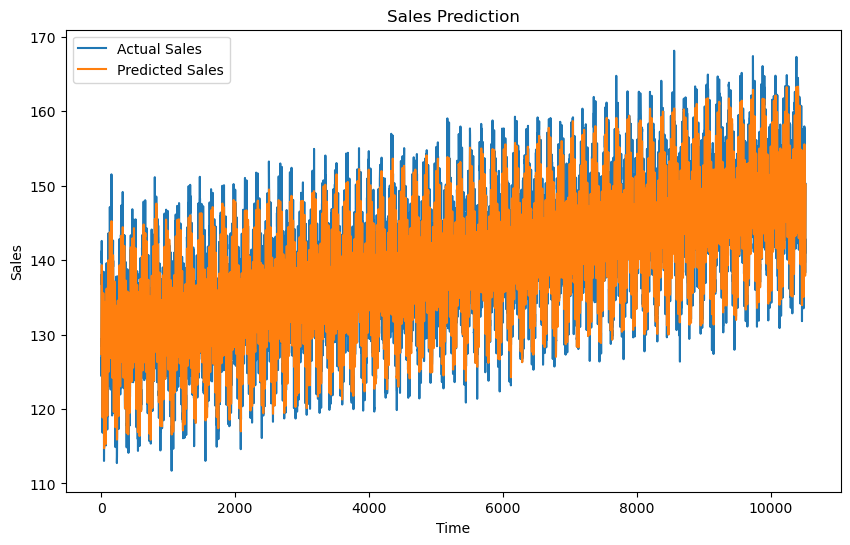

In [28]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(valid, label='Actual Sales')
plt.plot(predicted_closing_price, label='Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Future predictions

In [19]:
# Number of future days to predict
future_days = 50

# Define your window size (number of previous days of data the model uses to make a prediction)
window_size = 60

# Last `window_size` days from the training data
inputs = data[-window_size:].tolist()

# Scale the inputs
inputs = scaler.transform(np.array(inputs).reshape(-1, 1))

for _ in range(future_days):
    X_test = []
    X_test.append(inputs[-window_size:])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Predict the next day and append to inputs
    predicted_price = model.predict(X_test)
    inputs = np.append(inputs, predicted_price)
    
# Inverse transform the predicted data
predicted_prices = scaler.inverse_transform(inputs[window_size:].reshape(-1,1))

print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

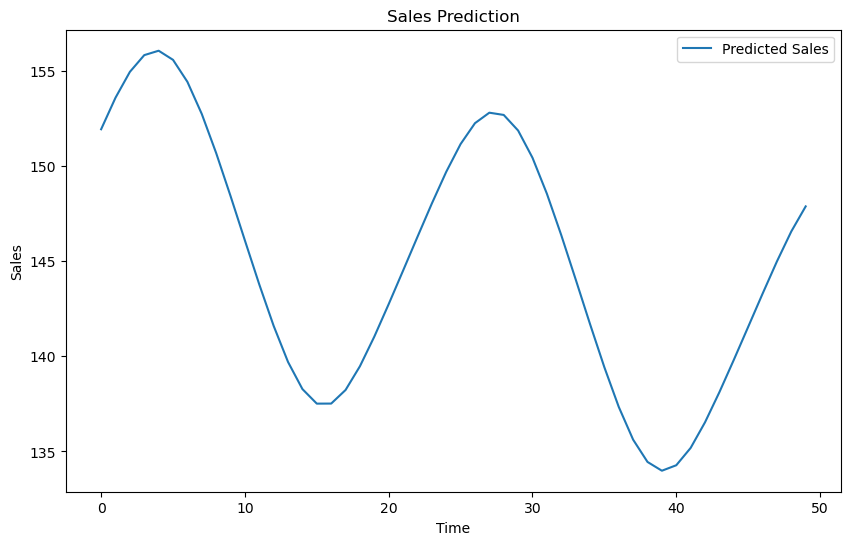

In [21]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(predicted_prices, label='Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()